In [11]:
!pip install pandas numpy matplotlib statsmodels pymc scikit-learn seaborn  openpyxl


Defaulting to user installation because normal site-packages is not writeable

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import datetime
import os

In [3]:
os.chdir("C:/Users/USER/Documents/60_Decibels")

In [4]:
df = pd.read_excel("data.xlsx")
df.columns


Index(['account_ref', 'Customer_Id', 'Customer_Name', 'Phone_Number',
       'Full Deposit Date', 'Sale_Date', 'Seller type', 'CDS1 Date',
       'CDS2 Date', 'Units', 'Account_type', 'Product', 'Status',
       'Funnel status', 'Credit_check', 'Credit_Score', 'assignment_date',
       'Assigned_engineer', 'dispatch_date', 'customer_preferred_date',
       'jsf_date', 'Engineer_recommendation', 'JSF_Status', 'Jsf_engineer',
       'Device_ID', 'customer_preferred_schedule_type', 'JSF_type', 'Agent',
       'Supervisor_name', 'Department', 'Amount_Paid', 'Discount_Amount',
       'Product Value', 'Region', 'District', 'Town', 'Gps',
       'Next of Kin Name', 'Next of Kin PhoneNumber', 'Engineer_Comment',
       'Repo_type', 'Repo_status', 'Date_of_Birth', 'Gender'],
      dtype='object')

In [5]:
df =df[['Customer_Id','Sale_Date','Product','Region','Account_type','Gender','Date_of_Birth','District','Units']]


In [6]:
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'])

In [7]:
df['Age']= datetime.datetime.now().year - df['Date_of_Birth'].dt.year

df.isnull().sum()

Customer_Id        1
Sale_Date          1
Product            1
Region             2
Account_type       1
Gender             4
Date_of_Birth    361
District           2
Units              0
Age              361
dtype: int64

In [8]:
# Define which columns must NOT be null
required_cols = ["Customer_Id", "Sale_Date", "Product", "Region", "Account_type", "Gender","District","Units"]

# Drop rows that have nulls in these required columns
df_clean = df.dropna(subset=required_cols)

df_clean.isnull().sum()


Customer_Id        0
Sale_Date          0
Product            0
Region             0
Account_type       0
Gender             0
Date_of_Birth    357
District           0
Units              0
Age              357
dtype: int64

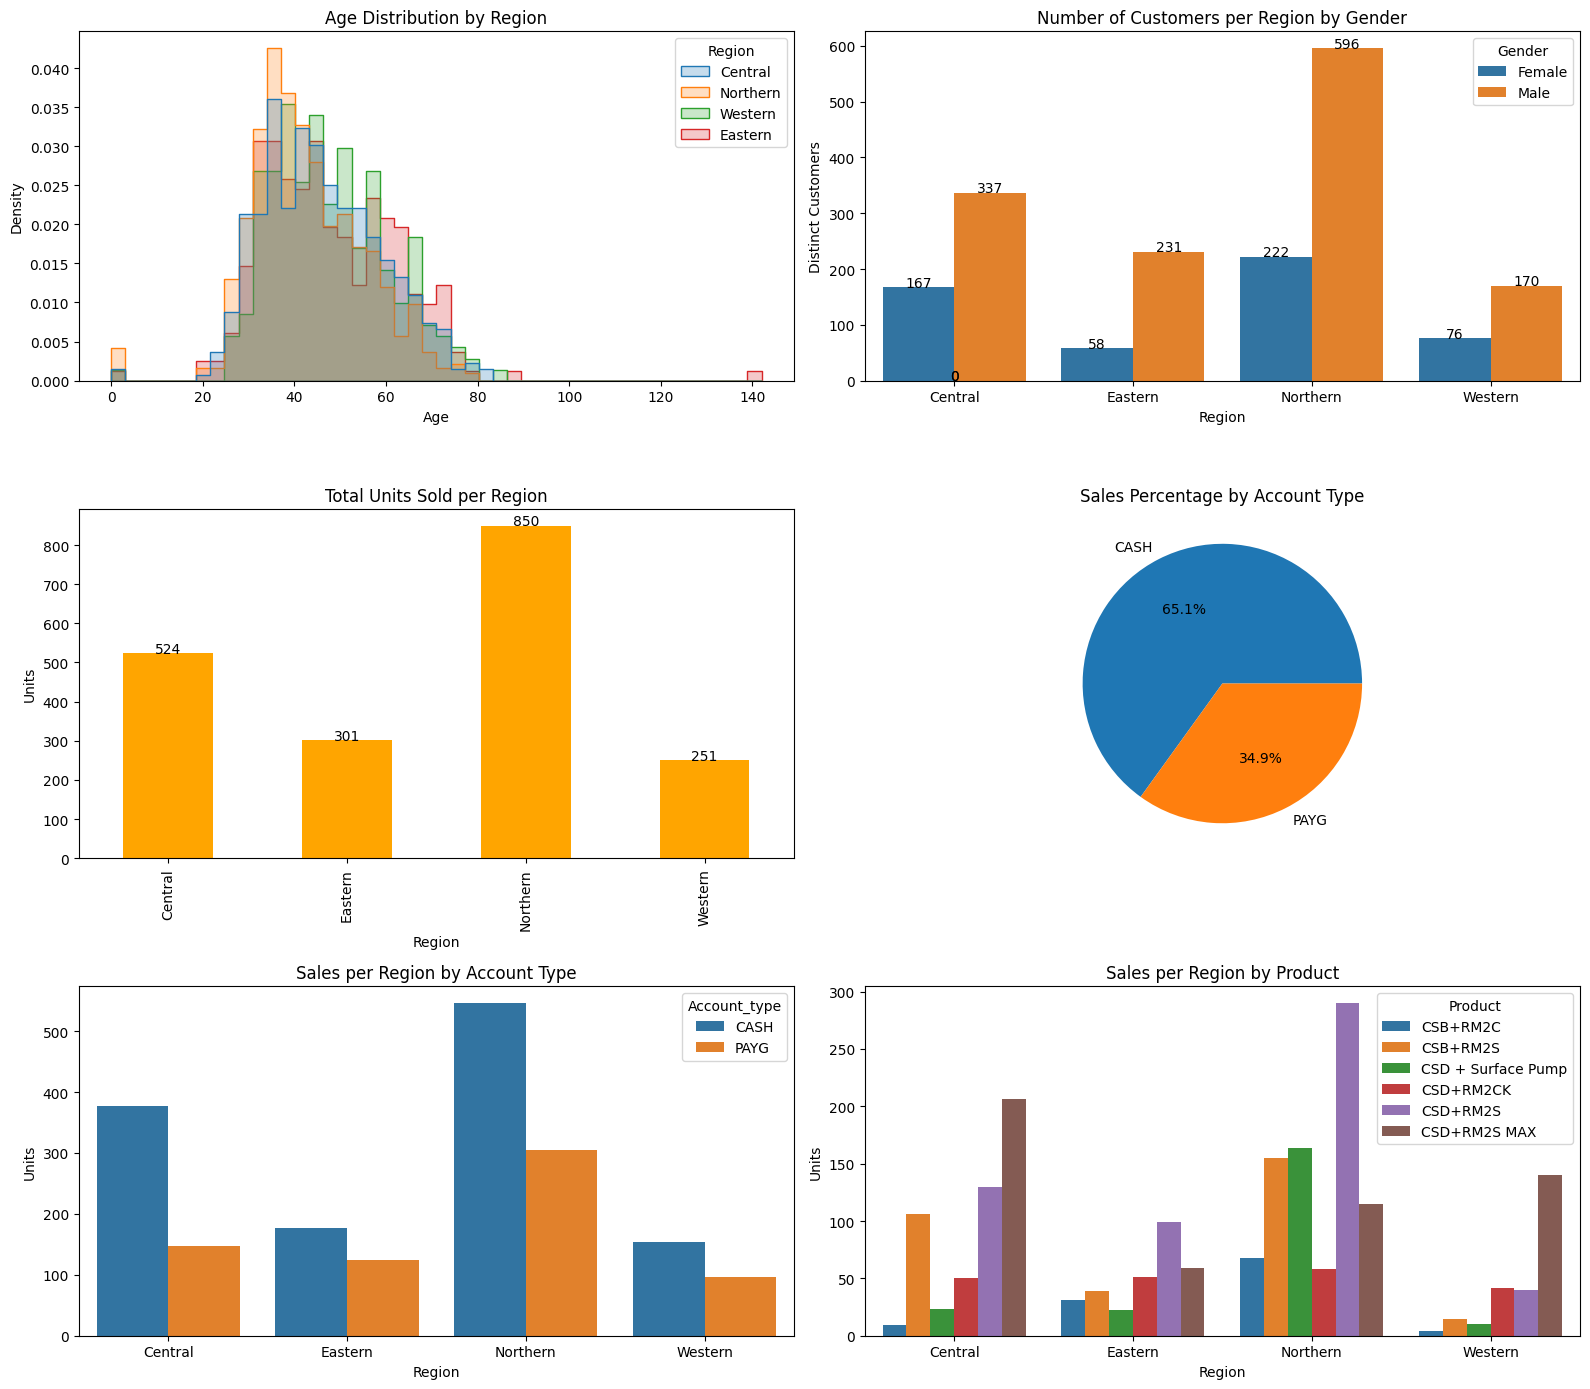

In [9]:

# Distinct customers per region
customers_region_gender = (
    df_clean.groupby(['Region', 'Gender'])['Customer_Id'].nunique().reset_index())

# Total units sold per region
sales_per_region = df_clean.groupby('Region')['Units'].sum()

# Percentage of sales by account type
sales_per_account = df_clean.groupby('Account_type')['Units'].sum()
sales_pct = (sales_per_account / sales_per_account.sum()) * 100

# Sales per region by account type
sales_region_account = df_clean.groupby(['Region', 'Account_type'])['Units'].sum().reset_index()

# Sales per region by product
sales_region_product = df_clean.groupby(['Region', 'Product'])['Units'].sum().reset_index()

#Subplots Layout
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# Age Distribution
sns.histplot(data=df_clean, x="Age", hue="Region", element="step", stat="density", common_norm=False, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution by Region')

# Number of Customers per Region
sns.barplot(
    data=customers_region_gender,
    x="Region", y="Customer_Id", hue="Gender",
    ax=axes[0, 1]
)

axes[0, 1].set_title('Number of Customers per Region by Gender')
axes[0, 1].set_ylabel('Distinct Customers')

# Add value labels
for p in axes[0, 1].patches:
    height = p.get_height()
    axes[0, 1].text(
        p.get_x() + p.get_width() / 2.,
        height + 0.5,
        int(height),
        ha="center"
    )

#Units Sold per Region
sales_per_region.plot(kind='bar', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Total Units Sold per Region')
axes[1, 0].set_ylabel('Units')
for i, v in enumerate(sales_per_region):
    axes[1, 0].text(i, v + 0.5, str(v), ha='center')

#Percentage of Sales per Account Type
sales_pct.plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 1])
axes[1, 1].set_title('Sales Percentage by Account Type')
axes[1, 1].set_ylabel('')

#Sales per Region by Account Type
sns.barplot(data=sales_region_account, x="Region", y="Units", hue="Account_type", ax=axes[2, 0])
axes[2, 0].set_title('Sales per Region by Account Type')
axes[2, 0].set_ylabel('Units')

#Sales per Region by Product
sns.barplot(data=sales_region_product, x="Region", y="Units", hue="Product", ax=axes[2, 1])
axes[2, 1].set_title('Sales per Region by Product')
axes[2, 1].set_ylabel('Units')

plt.tight_layout()
plt.show()


In [10]:
#Using Median to replace null values in the Age column
df_clean['Age'] = df_clean.groupby('District')['Age'].transform(lambda x: x.fillna(x.median()))


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\USER\AppData\Local\Temp\ipykernel_2124\1174870096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age'] = df_clean.groupby('District')['Age'].transform(lambda x: x.fillna(x.median()))


In [11]:
df_clean.isnull().sum()


Customer_Id        0
Sale_Date          0
Product            0
Region             0
Account_type       0
Gender             0
Date_of_Birth    357
District           0
Units              0
Age                3
dtype: int64

In [12]:
df_final = df_clean.dropna(subset=['Age'])

In [66]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Bayesian total sample size + proportional stratified allocation

from scipy.stats import beta as sp_beta

# ---------- PARAMETERS ----------
IndicatorCol = None   # binary indicator column. If None, auto-detect.
target_width = 0.10   # desired 95% posterior interval width (e.g., 0.10 => ±5%)
max_n = 1854
step = 50             # step for searching sample size
prior_alpha = 1       # Beta(alpha, beta) prior
prior_beta = 1
strata_cols = ['Region', 'Gender', 'Account_type', 'Product']  # ✅ includes Product
min_per_stratum = 5
random_seed = 2025

# ---------- 0. Frame and indicator detection ----------
try:
    frame = df_final.copy()
    print("✅ Using df_clean from memory.")
except NameError:
    raise RuntimeError("df_clean not found. Load your pump customer frame into variable `df_clean`.")

# Decide indicator column
if IndicatorCol is None:
    if 'Units' in frame.columns:
        frame['_indicator'] = (frame['Units'].fillna(0) > 0).astype(int)
        IndicatorCol = '_indicator'
        print("Auto-selected indicator: Units > 0")
    else:
        frame['_indicator'] = frame['Age'].notnull().astype(int)
        IndicatorCol = '_indicator'
        print("Auto-selected indicator: Age.notnull() (fallback).")
else:
    if IndicatorCol not in frame.columns:
        raise ValueError(f"IndicatorCol '{IndicatorCol}' not found in dataframe.")
    # Ensure binary (map to 0/1 if needed)
    if frame[IndicatorCol].nunique() > 2:
        if frame[IndicatorCol].dtype.kind in 'biufc':
            frame['_indicator'] = (frame[IndicatorCol].fillna(0) > 0).astype(int)
            IndicatorCol = '_indicator'
            print("Converted numeric indicator to binary (>0).")
        else:
            raise ValueError("Indicator column not binary. Provide a binary column or set IndicatorCol=None.")
    else:
        vals = sorted(frame[IndicatorCol].dropna().unique())
        if set(vals) <= {0,1}:
            frame['_indicator'] = frame[IndicatorCol].astype(int)
            IndicatorCol = '_indicator'
        else:
            mapping = {vals[0]: 0, vals[-1]: 1}
            frame['_indicator'] = frame[IndicatorCol].map(mapping).astype(int)
            IndicatorCol = '_indicator'
            print(f"Mapped {vals} to {mapping}.")

# Empirical baseline proportion
observed_p = frame[IndicatorCol].mean()
N_pop = frame['Customer_Id'].nunique()
print(f"Frame size (unique customers): {N_pop}, observed indicator proportion p_hat = {observed_p:.4f}")

# ---------- 1. Beta-Binomial posterior function ----------
def beta_posterior_hdi_width(k, n, alpha=1, beta_param=1, hdi_prob=0.95):
    a_post = alpha + k
    b_post = beta_param + n - k
    lower = sp_beta.ppf((1-hdi_prob)/2, a_post, b_post)
    upper = sp_beta.ppf(1 - (1-hdi_prob)/2, a_post, b_post)
    return upper - lower, (lower, upper)

# ---------- 2. Find minimal Bayesian sample size ----------
def find_min_n_bayesian(p_assumed, target_width=0.10, max_n=5000, step=50, alpha_prior=1, beta_prior=1):
    for n in range(step, max_n + 1, step):
        k = int(round(p_assumed * n))
        width, ci = beta_posterior_hdi_width(k, n, alpha=alpha_prior, beta_param=beta_prior, hdi_prob=0.95)
        print(f"n={n:5d}  k={k:4d}  CI width={width:.4f}  95% CI=({ci[0]:.4f},{ci[1]:.4f})")
        if width <= target_width:
            return n, k, width, ci
    return None, None, None, None

assumed_p = observed_p
print(f"\nUsing assumed p = observed p_hat = {assumed_p:.4f} for Bayesian sizing.")

min_n, min_k, final_width, final_ci = find_min_n_bayesian(
    assumed_p, target_width=target_width, max_n=max_n, step=step,
    alpha_prior=prior_alpha, beta_prior=prior_beta
)

if min_n is None:
    raise RuntimeError("❌ Could not find n up to max_n that meets target_width. Increase max_n or relax target_width.")

print(f"\n✅ Suggested total sample size (Bayesian analytic): n = {min_n}, posterior width = {final_width:.4f}, 95% CI = ({final_ci[0]:.4f}, {final_ci[1]:.4f})")

# ---------- 3. Stratified proportional allocation ----------
available_strata = [c for c in strata_cols if c in frame.columns]
if not available_strata:
    raise RuntimeError("❌ No strata columns available in the frame.")

print("Using strata columns for allocation:", available_strata)

# Count unique customers per stratum
strata_ser = frame.groupby(available_strata)['Customer_Id'].nunique()
total_customers = strata_ser.sum()
print(f"Total customers across strata: {total_customers}")

# Proportional allocation
alloc = (strata_ser / total_customers * min_n).round().astype(int)

# Fix rounding to match total sample size
diff = int(min_n - alloc.sum())
if diff != 0:
    idx = 0
    keys = list(alloc.index)
    while diff != 0:
        key = keys[idx % len(keys)]
        alloc.loc[key] += 1 if diff > 0 else -1
        diff = int(min_n - alloc.sum())
        idx += 1

# Enforce minimum per stratum
alloc = alloc.apply(lambda x: max(x, min_per_stratum))

# Re-adjust if total exceeds min_n
while alloc.sum() > min_n:
    reducible = alloc[alloc > min_per_stratum].sort_values(ascending=False)
    if reducible.empty:
        break
    top = reducible.index[0]
    alloc.loc[top] -= 1

# Final allocation table
alloc_df = alloc.reset_index()
alloc_df.columns = available_strata + ['n_alloc']

print("\n📊 Stratified allocation (first 30 rows):")
print(alloc_df.head(30))
print(f"\nTotal Sample Size to consider = {alloc.sum()}")

# Save to CSV
alloc_df.to_csv("bayes_stratified_allocation.csv", index=False)
print("\n✅ Allocation saved to 'bayes_stratified_allocation.csv'")


✅ Using df_clean from memory.
Auto-selected indicator: Units > 0
Frame size (unique customers): 1854, observed indicator proportion p_hat = 1.0000

Using assumed p = observed p_hat = 1.0000 for Bayesian sizing.
n=   50  k=  50  CI width=0.0693  95% CI=(0.9302,0.9995)

✅ Suggested total sample size (Bayesian analytic): n = 50, posterior width = 0.0693, 95% CI = (0.9302, 0.9995)
Using strata columns for allocation: ['Region', 'Gender', 'Account_type', 'Product']
Total customers across strata: 1890

📊 Stratified allocation (first 30 rows):
     Region  Gender Account_type             Product  n_alloc
0   Central  Female         CASH            CSB+RM2C        5
1   Central  Female         CASH            CSB+RM2S        5
2   Central  Female         CASH  CSD + Surface Pump        5
3   Central  Female         CASH           CSD+RM2CK        5
4   Central  Female         CASH            CSD+RM2S        5
5   Central  Female         CASH        CSD+RM2S MAX        5
6   Central  Female    

In [ ]:
#Total allocated sample size per Region
import pandas as pd

# Load the file
alloc_df = pd.read_csv("bayes_stratified_allocation.csv")

# Total n_alloc per Region
region_totals = alloc_df.groupby("Region")["n_alloc"].sum().reset_index()

print("\n📊 Total allocated sample size per Region:")
print(region_totals)



📊 Total allocated sample size per Region:
     Region  n_alloc
0   Central      120
1   Eastern      120
2  Northern      120
3   Western      110


In [16]:
# Save df_final to Excel
output_path = "Customers.xlsx"   # change path/name as needed
df_final.to_excel(output_path, index=False)

**SUMMARY**
A total of 1,854 unique customers were included in determining the representative survey sample. Each of these customers owns at least one pump that is currently in use. The customers considered joined SunCulture between 2022 and 26 September 2025.

Based on the analysis, the recommended survey sample size is 470 customers, distributed as follows: 120 customers each in Central, Eastern, and Northern regions, and 110 customers in the Western region.

The accompanying Excel file provides a detailed breakdown of the sample size by Region, Gender, Account Type, and Product.

In [20]:

# Count available customers per stratum
strata_counts = (
    frame.groupby(available_strata)['Customer_Id']
    .nunique()
    .reset_index(name='N_available')
)

# Merge available counts into allocation table
alloc_df = alloc_df.merge(strata_counts, on=available_strata, how='left')

# Cap allocations so they do not exceed available customers
alloc_df['n_alloc'] = alloc_df[['n_alloc', 'N_available']].min(axis=1).astype(int)

print("\n📊 Adjusted stratified allocation (first 30 rows):")
print(alloc_df.head(30))
print(f"\nAdjusted total sample size = {alloc_df['n_alloc'].sum()} (target was {min_n})")

# --- Step 2: Select actual sample ---
selected_samples = []

for _, row in alloc_df.iterrows():
    # Filter this stratum
    subset = frame.copy()
    for col in available_strata:
        subset = subset[subset[col] == row[col]]

    # Sample without replacement (unique customers only)
    if len(subset) >= row['n_alloc']:
        sample = subset.sample(n=row['n_alloc'], random_state=random_seed)
    else:
        sample = subset  # take all if fewer available

    selected_samples.append(sample)

# Combine all selected strata samples
final_sample = pd.concat(selected_samples, ignore_index=True)

print(f"\n✅ Final selected sample size = {final_sample['Customer_Id'].nunique()} unique customers")

# Save to Excel
final_sample.to_excel("bayes_selected_sample.xlsx", index=False)
print("\n💾 Final selected sample saved to 'bayes_selected_sample.xlsx'")



📊 Adjusted stratified allocation (first 30 rows):
     Region  Gender Account_type             Product  n_alloc  N_available
0   Central  Female         CASH            CSB+RM2C        5            6
1   Central  Female         CASH            CSB+RM2S        5           24
2   Central  Female         CASH  CSD + Surface Pump        5            6
3   Central  Female         CASH           CSD+RM2CK        5           20
4   Central  Female         CASH            CSD+RM2S        5           25
5   Central  Female         CASH        CSD+RM2S MAX        5           56
6   Central  Female         PAYG            CSB+RM2C        1            1
7   Central  Female         PAYG            CSB+RM2S        5           14
8   Central  Female         PAYG  CSD + Surface Pump        2            2
9   Central  Female         PAYG           CSD+RM2CK        1            1
10  Central  Female         PAYG            CSD+RM2S        5            9
11  Central  Female         PAYG        CSD+RM2S 